# Classification models

## 1. Logistic regression classification methods

In this section, we'll use a logistic regression methods as a main core of our final classification algorithms.
Logistic regression is based on decision taken by the algorithm to put example into either 0 or 1 groups. 
In our case :  

* **Group 1 :** banknote is considered as conform
* **Groupe 0 :** banknote is a fraud  

Classification decision taken by the algorithms is based on the results of the comparison between linear equation value and a given threshold. A linear equation looks like : `y = theta_0 + theta_1*x_1 + theta_2 * x_2 ... + theta_n * x_n ` where **X** and **theta** are respectively the feature vector and parametric vector.

- **X** is given by each example of our population as an input value
- **Theta** is determined as a result of the cost function minimize


Finally, for a given example, logistic regression algorithm will evaluate the following inequation :  `theta_0 + theta_1*x_1 + theta_2 * x_2 ... + theta_n * x_n > threshold` in order to classify input (random banknote) as conform or fraud




### 1.1 Models feeding

In [85]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
data_set

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [111]:
# data_input : path to input csv file


def ONCFM_Algorithm(path_data_input, caracteristics_display=False, csv_saving = None):
    


    # data set loading from preprocessing notebook results

    data_set = pd.read_csv("../Data_set/imputed_data.csv")

    # Rescaling the data_set

    features = data_set.columns[1:]
    y_label = data_set.columns[0]

    #rescaler = preprocessing.StandardScaler()
    #data_standardized = rescaler.fit_transform(data_set[features])
    #data_standardized_pd = pd.DataFrame(data_standardized, columns = features)
    #data_standardized = pd.concat([data_standardized_pd, data_set[y_label]], axis=1)

    # splitting data_set into training and testing set

    X = data_set[features]
    y = data_set[y_label]


    X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)


    # Regression logistic models
    # 'ovr' means binary classification
    # 'liblinear' faster with small data_set
    # 'balanced' Auto balanced binary classes methods

    lr = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced').fit(X_train,y_train)
    
    if caracteristics_display:

        # Model Description

        print("\n \t\t\t ----- \033[1mTHETA PARAMETERS MATRIX\033[0m ----- \n")
        print("\n\033[1mFEATURE NAME\033[0m : \033[1mWEIGHT\033[0m \n")
        for feature,coeff in zip(features, (lr.coef_.flatten())) :
            print("\033[1m{}\033[0m : {}".format(feature, coeff))

        # Model performances

        y_predict = lr.predict(X_test)
        print("\n")
        print("\t\t\t ----- \033[1mCONFUSION MATRIX\033[0m ----- \n")
        ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
        plt.show()
        print("\t\t\t ----- \033[1mMODEL PERFORMANCES\033[0m ----- \n")
        print(classification_report(y_test,y_predict))

        # Model prediction on input_data
    
    input_data = pd.read_csv(path_data_input, sep=",")
    predicted_data = lr.predict(input_data[features])
    input_data["predicted"] = predicted_data
    
    if csv_saving is None:
         return input_data
    else:
        input_data.to_csv()


 			 ----- THETA PARAMETERS MATRIX ----- 


FEATURE NAME : WEIGHT 

diagonal : -0.09576553009495795
height_left : -1.5784020183164262
height_right : -2.1782892864028227
margin_low : -3.435907026811299
margin_up : -3.212856826153504
length : 3.848390077376807


			 ----- CONFUSION MATRIX ----- 



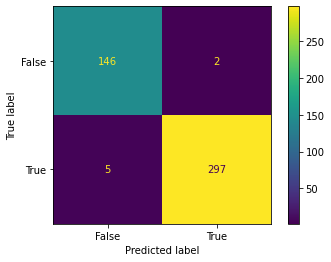

			 ----- MODEL PERFORMANCES ----- 

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       148
        True       0.99      0.98      0.99       302

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



,diagonal,height_left,height_right,margin_low,margin_up,length,predicted
0,162.21,102.86,102.95,3.92,2.19,110.83,True
1,190.81,134.86,114.95,9.00,5.30,112.83,False
2,162.81,104.86,104.95,4.52,2.89,112.83,False


In [120]:
ONCFM_Algorithm("../Data/data_to_predict.csv", True)

## 1.2 Tested Model on outside data

In [113]:
ONCFM_Algorithm("../Data/billets_production.csv")

,diagonal,height_left,height_right,margin_low,margin_up,length,id,predicted
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


In [114]:
res = ONCFM_Algorithm("../Data/billets_production.csv")

In [118]:
label_0 = res[res["predicted"]]["id"].values
label_1 = res[~res["predicted"]]["id"].values

In [119]:
print("\033[1m{}\033[0m banknote's ids are fraud whereas \033[1m{}\033[0m ids are conform".format(label_0,label_1))

['A_4' 'A_5'] banknote's ids are fraud whereas ['A_1' 'A_2' 'A_3'] ids are conform


## 2. KMeans